# Ejemplo con datos de Yahoo finance
Ahora hacemos un análisis de proyección de presios con diferentes marcas.

Considere que esta proyección es más precisa conforme se aumenta el número de escenarios simulados, así como disminuye en función al número de días proyectados a futuro.

Me voy literalmente a buscar online "Yahoo finance" y me meto a la página, donde veo que INTC es Intel, NVDA es NVIDIA, F es Ford y AAPL es Apple;
quiero importar sus datos históricos.
Escojo los valores con los que voy a trabajar para importarlos:


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf #librería de yahoo finance, predeterminada solo para google collab
#en jupiter tendría que instalar 'yfinance' así:
#!pip install yfinance

/tmp/ipython-input-3506702119.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2020-10-24',end='2025-10-24')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
[*********************100%***********************]  4 of 4 completed


<Axes: xlabel='Date'>

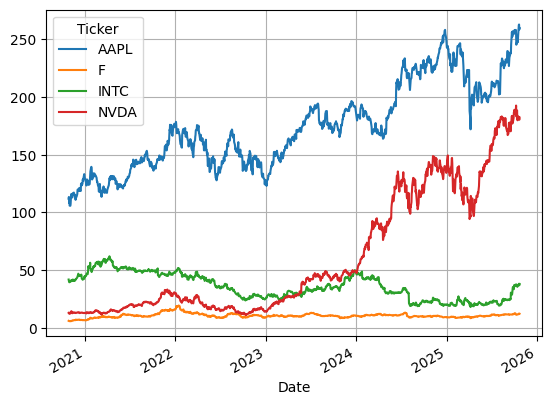

In [ ]:
#Descargamos las marcas de interés:
#INTC-> Intel
#NVDA -> NVIDIA
#F -> Ford
#AAPL -> Apple
tickers=['INTC','NVDA','F','AAPL']
data=yf.download(tickers,start='2020-10-24',end='2025-10-24')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
data.plot(grid=True)

<Axes: xlabel='Date'>

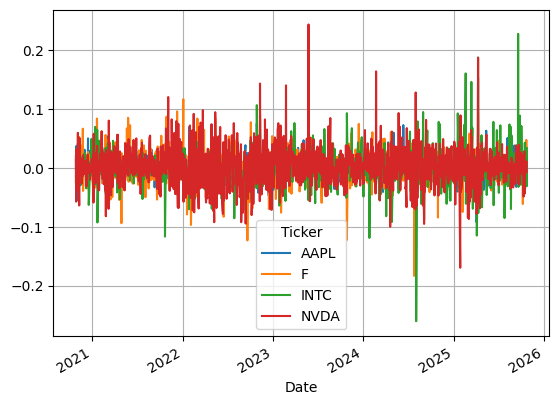

In [ ]:
#La media no es constante en NVDA por lo que este método no es adecuado para mi modelo
#Calculamos las diferencias porcentuales y graficamos
#Diferencia entre el precio actual y el anterior, dividido entre el precio actual
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [ ]:
#Podemos considerar medias constantes a lo largo del tiempo

array([[<Axes: title={'center': 'AAPL'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'INTC'}>,
        <Axes: title={'center': 'NVDA'}>]], dtype=object)

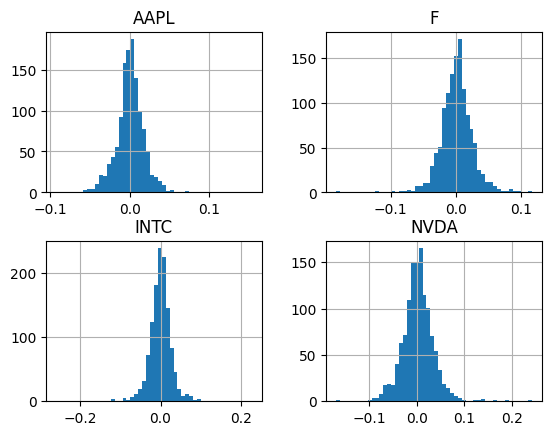

In [ ]:
delta.hist(bins=50, grid=True)

In [ ]:
#Veo que tengo algunos cesgos, la única centrada es INTC
#Si estuvieran más sesgados me convendría usar la distribución lognormal

In [ ]:
#Si la distribución no fuera normal, debería aplicarle una transformación de potencia para que se asemeje más a una distribución normal

In [ ]:
#Simulamos los deltas (retorno porcentual)
N_dias=30 #simulamos 30 días
N_escenarios=10000 #10000 escenarios
delta_INTC=np.random.normal(delta['INTC'].mean(),delta['INTC'].std(),(N_dias,N_escenarios))
delta_INTC[:2,:10] #Mostrar los primeros dos días y los primeros 10 escenarios

array([[ 0.00677614,  0.02492619,  0.03174107, -0.01210775, -0.00146865,
        -0.02800263, -0.02528207, -0.01075197, -0.00642122, -0.00944187],
       [ 0.06871711,  0.02126964, -0.01661713,  0.00768728,  0.01375027,
        -0.03348931, -0.00582193,  0.00691963,  0.02939768,  0.02285892]])

In [ ]:
#Para asociarlo a los días simulados, creamos un rango de tiempo
rango_tiempo=pd.date_range('2025-10-27',periods=N_dias)
rango_tiempo

DatetimeIndex(['2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30',
               '2025-10-31', '2025-11-01', '2025-11-02', '2025-11-03',
               '2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-15',
               '2025-11-16', '2025-11-17', '2025-11-18', '2025-11-19',
               '2025-11-20', '2025-11-21', '2025-11-22', '2025-11-23',
               '2025-11-24', '2025-11-25'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
delta_INTC=pd.DataFrame(delta_INTC,index=rango_tiempo)
delta_INTC

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-10-27,0.006776,0.024926,0.031741,-0.012108,-0.001469,-0.028003,-0.025282,-0.010752,-0.006421,-0.009442,...,0.004365,0.013226,-0.001402,-0.012625,-0.013786,0.000528,0.005762,-0.012473,0.034336,0.037743
2025-10-28,0.068717,0.021270,-0.016617,0.007687,0.013750,-0.033489,-0.005822,0.006920,0.029398,0.022859,...,-0.011259,-0.016945,0.014151,-0.011832,-0.014763,-0.048976,0.016627,0.027858,-0.001815,-0.017937
2025-10-29,0.032518,0.001896,-0.000792,0.017953,0.047574,0.030183,0.029521,0.047051,-0.026046,-0.011528,...,0.022598,-0.041068,-0.020769,0.025990,0.021567,0.006228,-0.004921,-0.060167,0.010242,-0.018074
2025-10-30,0.018572,-0.015146,0.000031,-0.012002,-0.062242,-0.003640,-0.002307,0.008063,0.013144,-0.004807,...,0.043338,0.017004,0.051404,0.013346,0.036639,-0.016809,0.068587,0.046691,-0.069551,-0.038577
2025-10-31,-0.003360,-0.033495,-0.008091,0.021825,-0.019220,-0.005456,-0.005217,-0.003225,0.021078,0.006659,...,-0.011952,0.000394,-0.001751,0.017242,0.017140,-0.015338,0.015439,0.015098,-0.005028,-0.036489
2025-11-01,0.035858,-0.018844,0.019966,-0.012704,0.015270,0.021171,-0.071474,0.028212,0.003795,0.001980,...,0.015266,-0.053802,0.041684,0.013964,0.028908,-0.014574,-0.023985,-0.033956,0.001593,0.001978
2025-11-02,-0.024641,-0.004575,0.052252,0.056284,-0.010057,0.015766,0.003058,0.021625,0.017738,-0.022620,...,-0.009242,-0.033696,0.022495,0.027101,0.024733,0.000647,-0.012183,0.028618,0.057135,0.047393
2025-11-03,-0.051650,-0.000730,0.008526,0.026916,-0.002647,-0.026224,-0.028899,0.003525,-0.006784,0.024097,...,0.002119,-0.015011,-0.015242,-0.017956,0.004637,0.007043,-0.034309,0.014132,-0.026356,0.010470
2025-11-04,-0.026477,-0.016786,-0.027257,0.005790,-0.023041,0.033125,0.011828,0.007708,-0.040034,-0.031217,...,0.035922,0.004372,0.055322,0.035192,0.051093,-0.005814,-0.036560,-0.030974,0.028611,0.012864
2025-11-05,0.018769,0.041573,0.025464,0.034157,0.039094,-0.054070,-0.044516,0.011351,0.006033,-0.001695,...,-0.046087,-0.023275,0.013907,0.021506,-0.034821,-0.011659,-0.015957,-0.008669,0.005581,0.036224


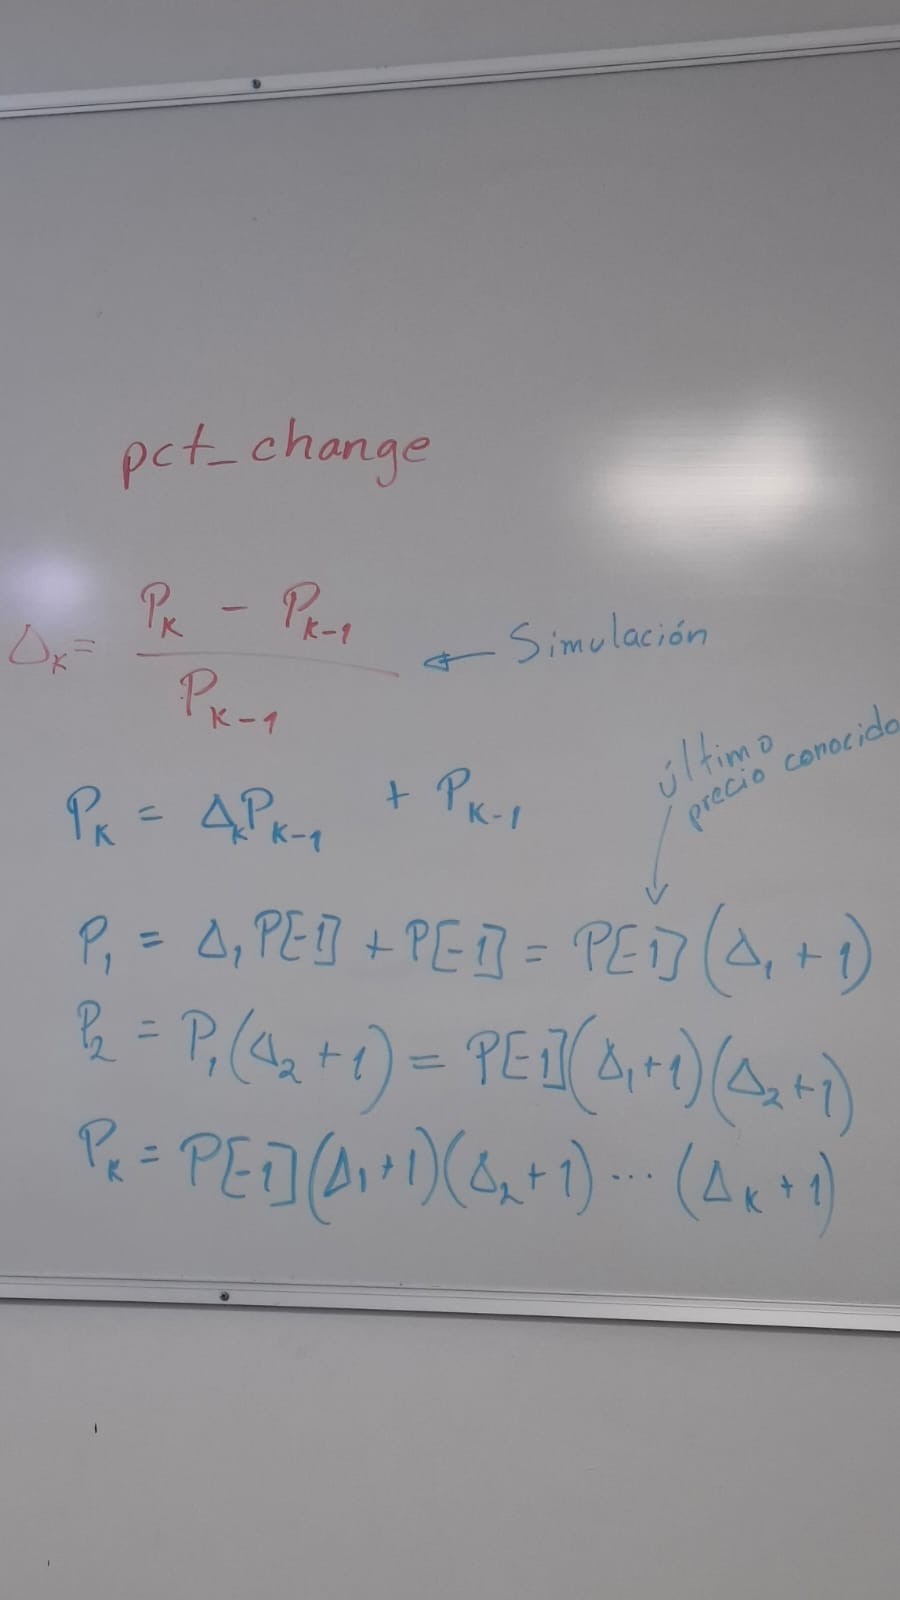

Proyección de precios

$$
P_k=P_0\Pi_{i=1}^k(\Delta_i+1),
$$
donde $P_k$ es el precio proyectado de la simulación den el periodo $k$, $\Delta_i$ es la variación porcentual simulada en el periodo $i$ y $P_0$ es el último precio conocido.

In [ ]:
precios_INTC=data['INTC'].iloc[-1]*((delta_INTC+1).cumprod())
precios_INTC.iloc[:2,:5]

,0,1,2,3,4
2025-10-27,38.418577,39.111183,39.371239,37.697968,38.103956
2025-10-28,41.058591,39.943064,38.717002,37.987763,38.627896


¿Cuál es la probabilidad al final del mes de que el último valor conocido supere el 1%?

<Axes: >

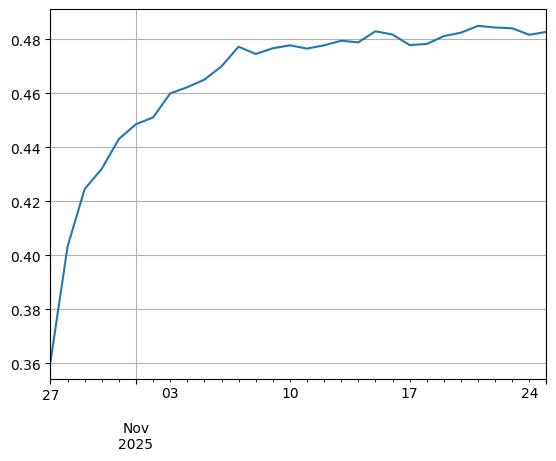

In [ ]:
B_INTC=precios_INTC>data['INTC'].iloc[-1]*1.01  #Variable de Bernoulli (Cuántos escenarios satisfacen la condición buscada)
proba_INTC=B_INTC.mean(axis=1)
proba_INTC.plot(grid=True)

Vemos que usando Simulación Montecarlo con 10,000 escenarios, la probabilidad a finales del mes llega a superar momentáneamente el $47$%

In [ ]:
#Definimos una función que, dados los datos extraídos, regrese el arreglo de probabilidades del ticker dado como argumento
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  #1. Calculamos las diferencias porcentuales (retorno porcentual)
  delta=data.pct_change().dropna() #el dropna me elimina los NaNs
  #3. Simulamos N_dias y N_escenarios
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  #2. Asociamos los datos a un rango de tiempo
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta=pd.DataFrame(delta_sim,index=rango_tiempo)
  #4. Hacemos una proyección de precios
  precios_simulados=data[ticker].iloc[-1]*((delta+1).cumprod()) #cuprod es producto acumulado
  #5. Calculamos la variable de Bernoulli
  B=precios_simulados>data[ticker].iloc[-1]*1.01
  #6. Sacamos la probabilidad que buscamos (con el promedio de la variable de Bernoulli)
  return B.mean(axis=1)

In [ ]:
import matplotlib.pyplot as plt

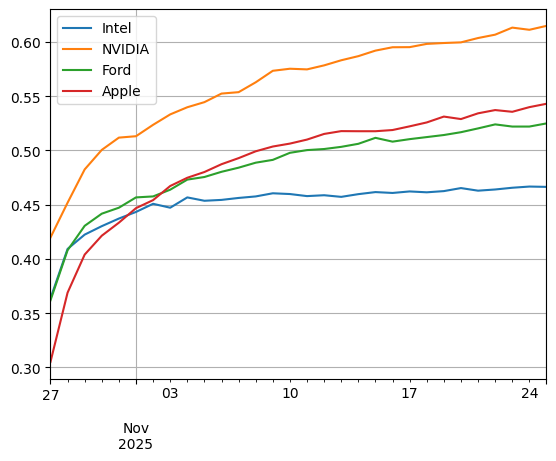

In [ ]:
simulacion(data,'INTC','2025-10-27',30,10000).plot(grid=True, label='Intel')
simulacion(data,'NVDA','2025-10-27',30,10000).plot(grid=True,label='NVIDIA')
simulacion(data,'F','2025-10-27',30,10000).plot(grid=True,label='Ford')
simulacion(data,'AAPL','2025-10-27',30,10000).plot(grid=True,label='Apple')
plt.legend()

---
## Ejemplo de sismos
Cortesía de un proyecto de Ingeniería Civil del periodo V2024 :)

Extraemos y limpiamos los datos de los últimos 10 años de sismos en México

In [ ]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd                            # Librería para definir entidades geométricas, útil para visualizar mapas
from sklearn.preprocessing import KBinsDiscretizer # Clase para agrupar variables como localidades

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# http://www2.ssn.unam.mx:8080/catalogo/
ruta='/content/drive/MyDrive/Simulacion/Simulacion_Matematica_2025/'
archivo='SSNMX_catalogo_20201029_20251029.csv'                  # Acá va el nombre del archivo
df_sismos=pd.read_csv(ruta+archivo,header=4)  # Omitimos la descripción del archivo de las primeras columnas
# df_sismos.head()
df_sismos.drop(columns=['Hora','Referencia de localizacion','Fecha UTC','Hora UTC','Estatus'],inplace=True)

México. Universidad Nacional Autónoma de México, I. d. G., Servicio Sismológico Nacional. (2025). *Catálogo de sismos*. Extraído de http://www2.ssn.unam.mx:8080/catalogo/



In [ ]:
# Eliminamos datos no numéricos
df_sismos['Magnitud']=df_sismos['Magnitud'].replace('no calculable',np.nan)
df_sismos['Magnitud']=df_sismos['Magnitud'].astype('float')
df_sismos.dropna(inplace=True)

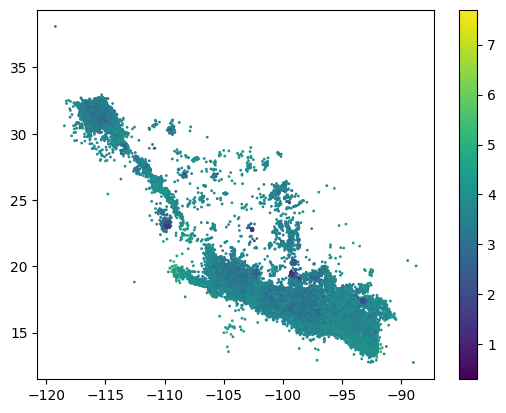

In [ ]:
plt.scatter(df_sismos['Longitud'],df_sismos['Latitud'],c=df_sismos['Magnitud'],s=1)
plt.colorbar()

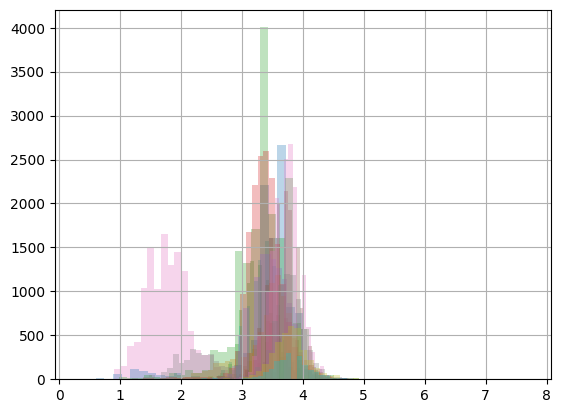

In [ ]:
# Creamos una nueva variable llamada 'Posicion' resultado de agrupar los sismos más cercano entre sí
#
disc=KBinsDiscretizer(n_bins=20,encode='ordinal',strategy='kmeans')   # Hacemos 8 grupos enumerados de 0 a 7
df_sismos['Posicion']=disc.fit_transform(df_sismos[['Longitud']])
# Cada 'Posicion' tiene asociados varios sismos
H=df_sismos.groupby('Posicion')['Magnitud'].hist(alpha=0.3,bins=50)

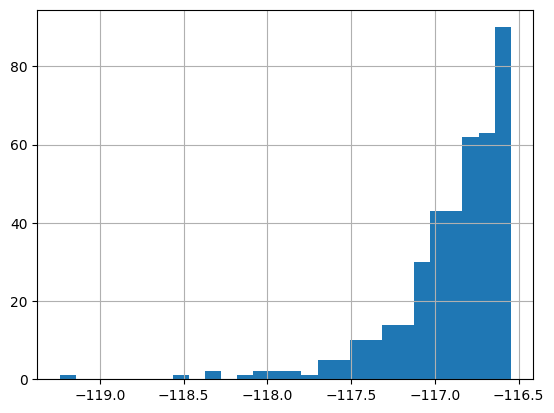

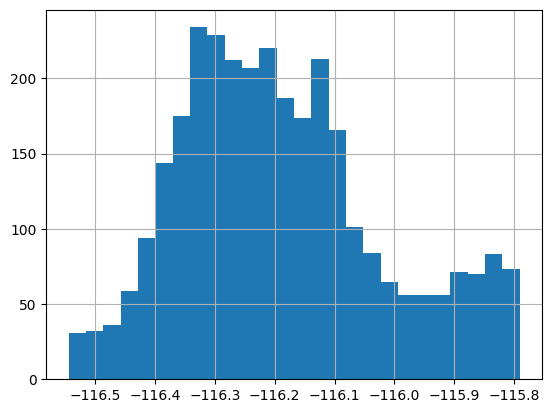

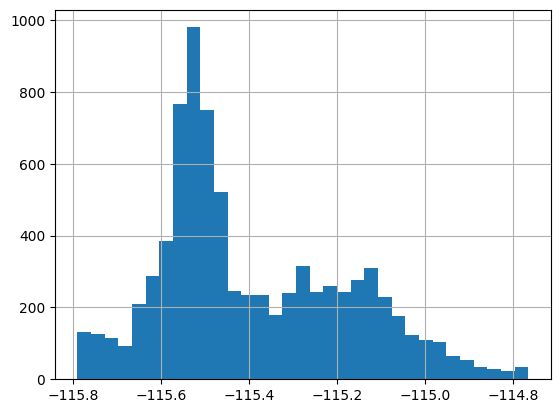

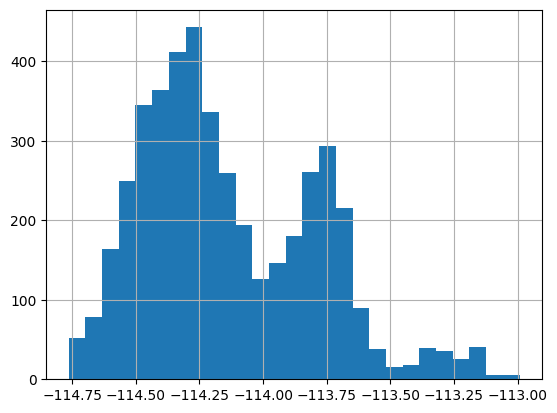

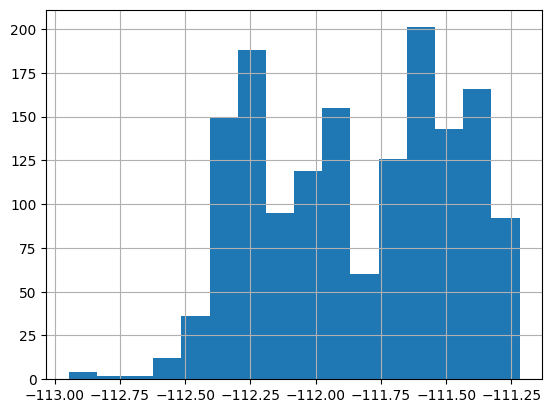

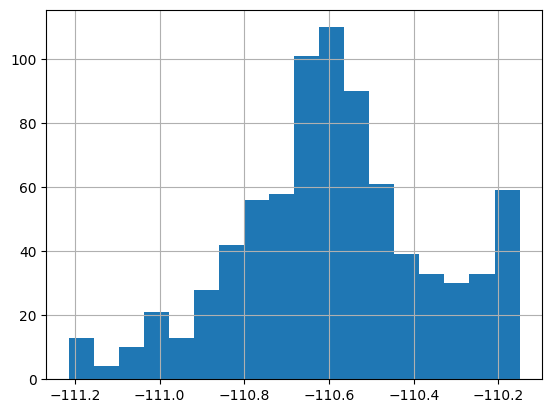

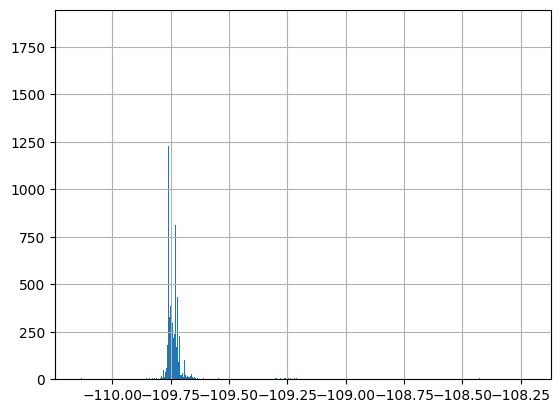

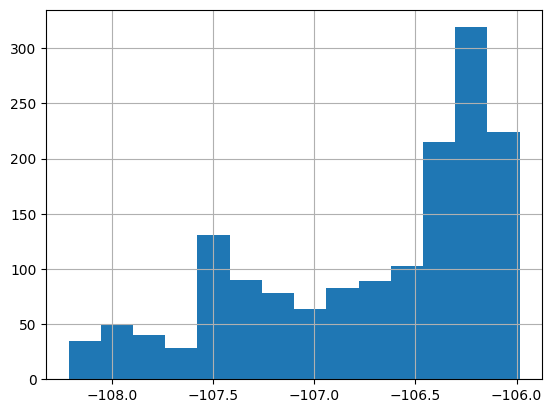

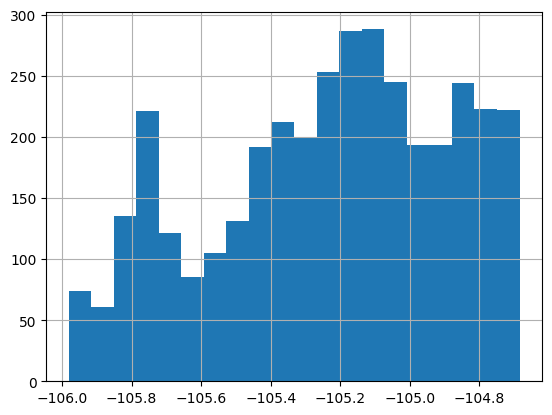

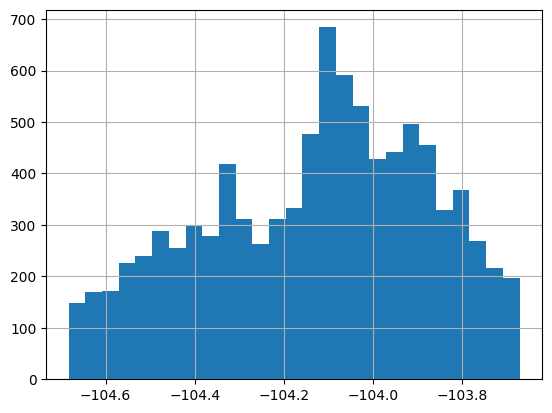

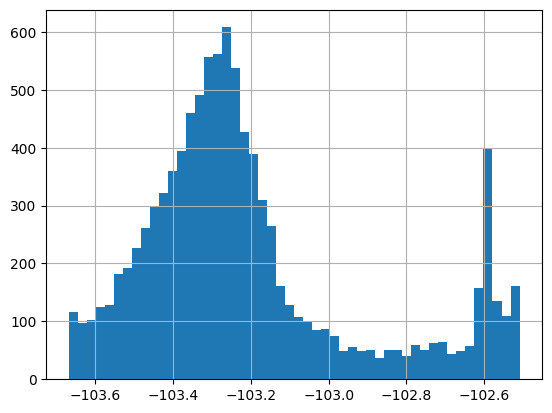

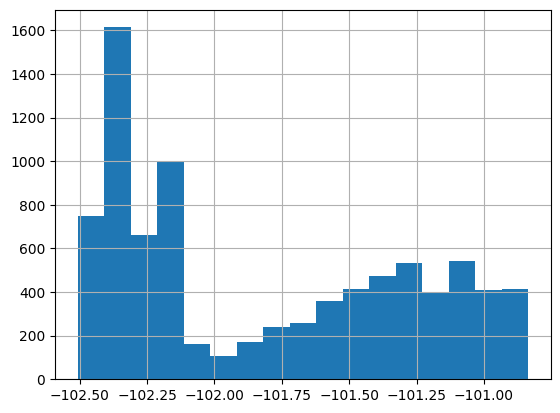

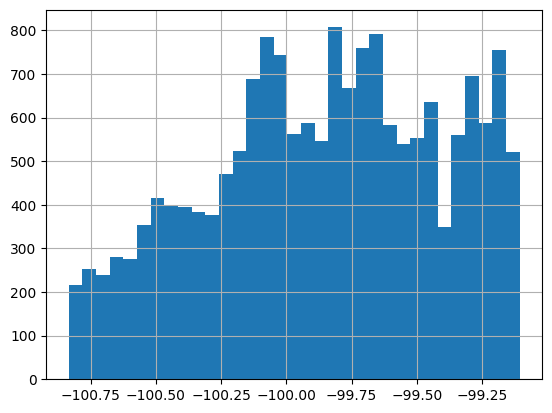

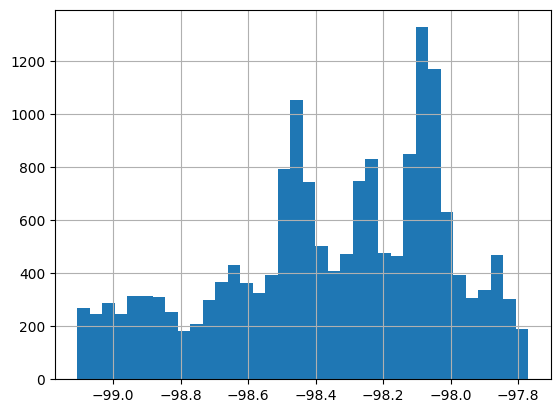

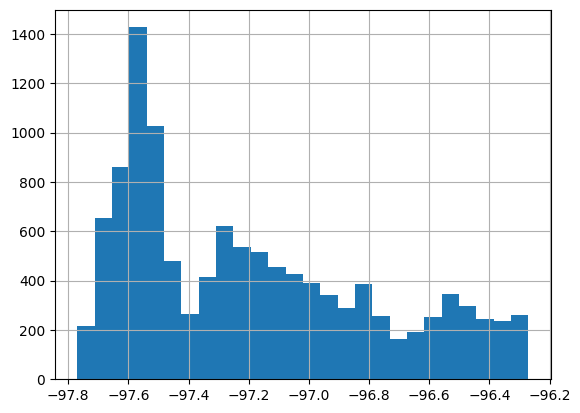

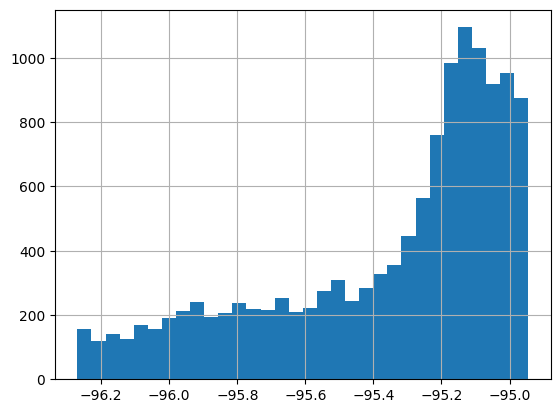

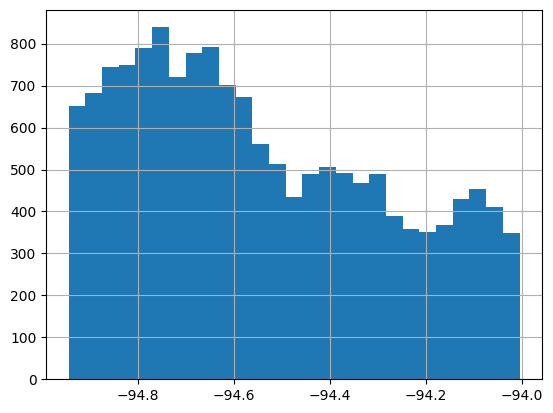

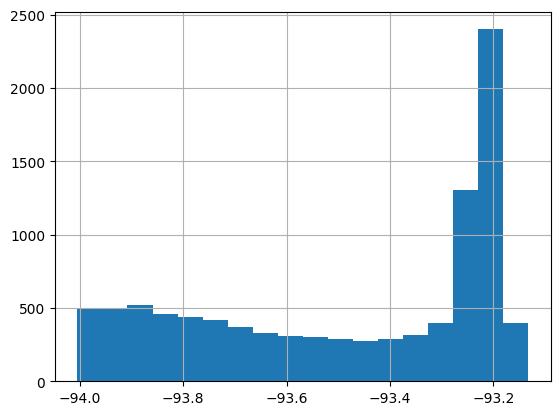

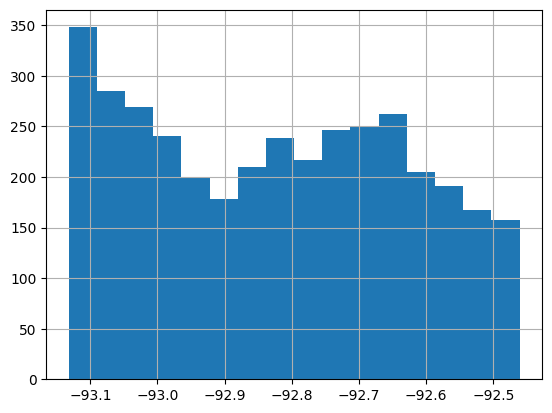

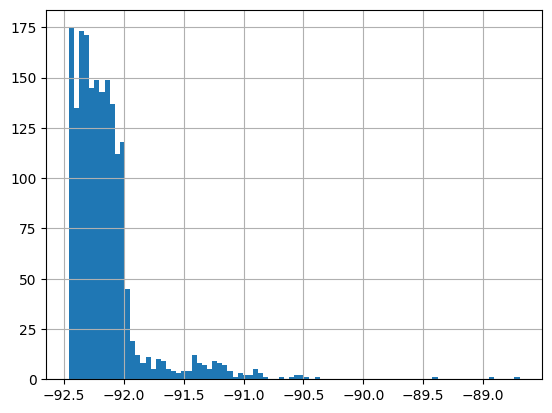

In [ ]:
# Creamos una nueva variable llamada 'Posicion' resultado de agrupar los sismos más cercano entre sí
#Quiero ver cada histograma por separado
n=20 #número de histogramas
for i in range(n):
  plt.figure()
  df_sismos.groupby('Posicion')['Longitud'].get_group(i).hist(bins='auto') #Agrupar por posición y de cada posición graficar sus longitudes.

Text(33.972222222222214, 0.5, 'Latitud')

<Figure size 640x480 with 0 Axes>

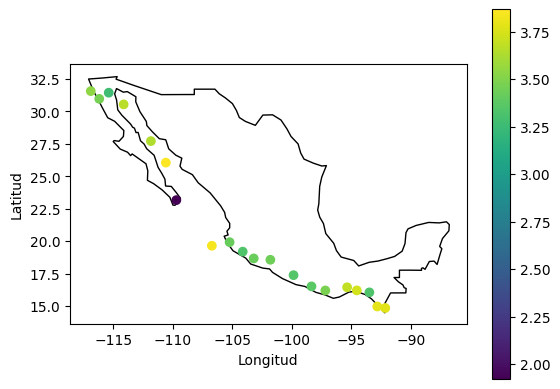

In [ ]:
# Graficamos los datos obtenidos
#
# Coordenadas de cada 'Posicion'
lon=df_sismos.groupby('Posicion')['Longitud'].mean()
lat=df_sismos.groupby('Posicion')['Latitud'].mean()
# Mapa de México
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
file_shp=ruta+'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world=gpd.read_file(file_shp)
mexico=world[world.ABBREV=='Mex.']
#
# Visualización de los resultados
fig=plt.figure()
mexico.plot(color='white', edgecolor='black')
#
# Historico de sismos
plt.scatter(lon,lat,c=df_sismos.groupby('Posicion')['Magnitud'].mean())
plt.colorbar()
#
# Etiquetas ;)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

<Axes: xlabel='Posicion'>

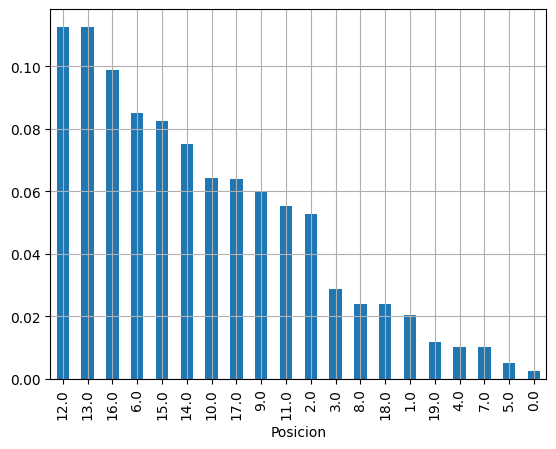

In [ ]:
posicion=df_sismos['Posicion'].value_counts(normalize=True) #Probabilidad de ocurrencia en cada posicion
posicion.plot(kind='bar',grid=True)

In [ ]:
df_sismos['Posicion'].value_counts()

,count
Posicion,
3.0,27959
5.0,27457
6.0,27138
4.0,21984
7.0,16948
2.0,15206
0.0,11674
1.0,5225


In [ ]:
#Calculo las probabilidades de ocurrencia a partir de esas posiciones:
posicion=df_sismos['Posicion'].value_counts(normalize=True)
posicion

,proportion
Posicion,
12.0,0.112604
13.0,0.112552
16.0,0.098808
6.0,0.084998
15.0,0.082563
14.0,0.075200
10.0,0.064320
17.0,0.063858
9.0,0.059854


In [ ]:
np.random.choice(posicion.index,p=posicion.values)  #elige un valor aleatorio entre la columna izquierda con el atributo de probabilidad de la columna derecha

np.float64(3.0)

<Axes: >

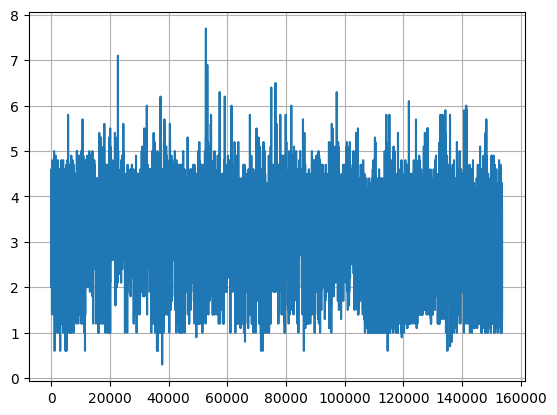

In [ ]:
#Para la variable 'magnitud', ¿Podemos suponer que la media y la desviación estándar se mantienen a lo largo del tiempo?
df_sismos['Magnitud'].plot(grid=True)

In [ ]:
#Extraemos la media y desviación estándar para cada agrupación de la 'Magnitud
medias=df_sismos.groupby('Posicion')['Magnitud'].mean()
medias

,Magnitud
Posicion,
0.0,3.533915
1.0,3.460038
2.0,3.267159
3.0,3.664555
4.0,3.633161
5.0,3.867166
6.0,1.922421
7.0,3.837209
8.0,3.412242


In [ ]:
stds=df_sismos.groupby('Posicion')['Magnitud'].std()
stds

,Magnitud
Posicion,
0.0,0.218511
1.0,0.217602
2.0,0.253766
3.0,0.270505
4.0,0.303663
5.0,0.388308
6.0,0.652783
7.0,0.255409
8.0,0.356918


#semana 12


In [ ]:
#El modelo consiste en dos partes:
#1. La elección de la posición
#2. El cálculo de la magnitud dependiente de la posición
#
def simulacion_sismos(posicion, medias, stds, N_escenarios):
  '''Regresar la posición y magnitud del sismo'''
  #simulamos la posición:
  posicion_sim=np.random.choice(posicion.index,p=posicion.values,size=N_escenarios) #que escoja de posicion.index valores con p probabilidad
  #Simulamos la magnitud
  magnitud_sim=np.random.normal(medias[posicion_sim],stds[posicion_sim],N_escenarios ) #me regresa un valor dentro de la curva normal con mayor probabilidad entre más cercano a la media
  return posicion_sim,magnitud_sim

In [ ]:
simulacion_sismos(posicion,medias,stds,10)

(array([11., 16.,  9., 13.,  4.,  6., 14., 12.,  1.,  0.]),
 array([3.1692967 , 3.73690482, 3.30449352, 3.48601479, 3.47201985,
        1.65445498, 3.26046013, 4.06310358, 3.81797368, 3.35872108]))

Simularemos la probabilidad de que ocurra un sismo en alguna posición.

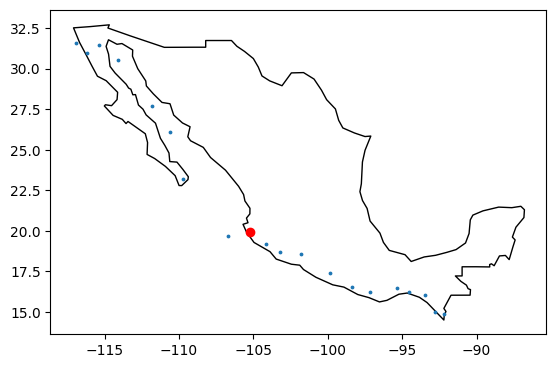

In [ ]:
mexico.plot(color='white', edgecolor='black')
plt.scatter(lon,lat,s=3)
plt.scatter(lon[8],lat[8],c='red')

In [ ]:
#Para la variable de Bernoulli:
pos_sim, mag_sim = simulacion_sismos(posicion,medias,stds,int(1E6)) #un millón = int(1E5)
B=(pos_sim==8) #Buscamos los escenarios que sean igual a 8
B.mean()

np.float64(0.023994)

In [ ]:
lon[8],lat[8]

(np.float64(-105.23236862106405), np.float64(19.936613327904453))

A traves de una simulación Montecarlo con un millón de escenarios, existe una probabilidad del $2$% de que ocurra un sismo en la posición 8, equivalente a (-105.2324, 19.9366)

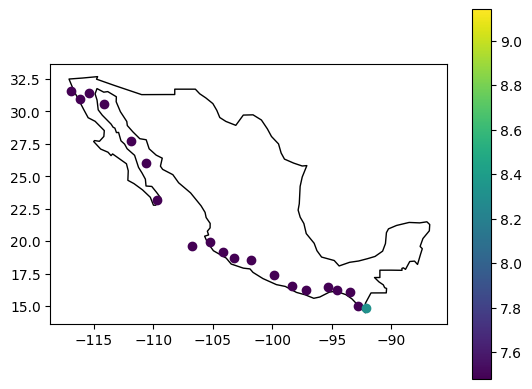

In [ ]:
#Calculamos la probabilidad de ocurrencia para una magnitud mayor a 4 grados Richter para cada posición
B=mag_sim>4
mexico.plot(color='white', edgecolor='black')
for i in range(20):
  plt.scatter(lon[i],lat[i],c=round(B.mean()*100,2))
plt.colorbar()

In [ ]:
lon[19],lat[19]

(np.float64(-92.15224362050162), np.float64(14.867016303162487))

Vemos una probabilidad uniforme para todas las posiciones, y destaca la última ($19$), que tiene probabilidad superior a $8\%$ y coordenadas (-92.152, 14.867)

In [ ]:
#Por último, buscamos la probabilidad de que ocurra un sismo en la posición 8 mayor a 4 grados Ritcher
B=(pos_sim==8)&(mag_sim>4) #puedo agregar más condiciones con un &
B.mean()

np.float64(0.001247)

Un escenario conjunto (de que ocurra un sismo en la posición $8$ y sea de magnitud mayor a 4 grados Ritcher, tiene una probabilidad de $0.12\%$.

<Axes: >

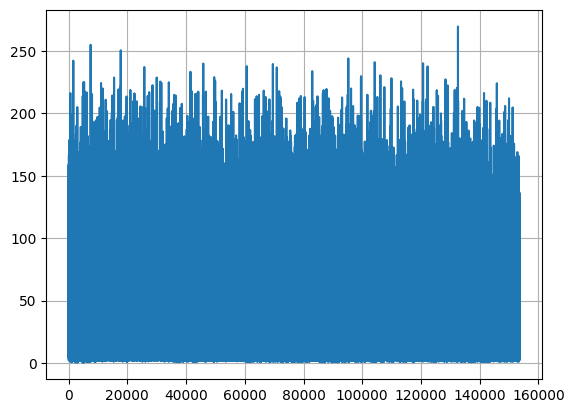

In [ ]:
#ejemplo de profundidad
df_sismos['Profundidad'].plot(grid=True)